<a href="https://colab.research.google.com/github/Ahtesham519/Genrative_Deep_learning_v2_2023/blob/main/Auto_encoder_5tled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, datasets , callbacks
import tensorflow.keras.backend as K



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#0. Parameters

In [13]:
IMAGE_SIZE = 32
CHANNELS = 1
BATCH_SIZE = 100
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 3


#1. Prepare the data


In [14]:
#load the data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


In [15]:
#Prepare the data

def preprocess(imgs):
  """
  Normalize and reshape the images
  """
  imgs = imgs.astype("float32") / 255.0
  imgs = np.pad(imgs,((0,0) , (2,2) , (2,2)) , constant_values = 0.0)
  imgs = np.expand_dims(imgs , -1)
  return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [16]:
#Show the items of clothing from the training set
display(x_train)



array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

#2. Bulid the autoencoder

In [17]:
#Encoder
encoder_input = layers.Input(
    shape = (IMAGE_SIZE , IMAGE_SIZE, CHANNELS) , name = "encoder_input"
)
x = layers.Conv2D(32, (3,3) , strides = 2, activation = "relu" , padding = "same")(
    encoder_input
)
x = layers.Conv2D(64, (3,3) , strides = 2, activation = "relu" , padding = "same")(x)
x = layers.Conv2D(128, (3,3), strides = 2, activation = "relu" , padding = "same")(x)
shape_before_flattening = K.int_shape(x)[1:]

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name = "encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
Total params: 96770 (378.01 KB)
Trainable params: 96770 (378.

In [20]:
#Decoder
decoder_input = layers.Input(shape = (EMBEDDING_DIM,), name = "decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3,3) , strides = 2, activation = "relu" , padding = "same"
)(x)
x = layers.Conv2DTranspose(
    64, (3,3), strides = 2, activation = "relu" , padding = "same"
)(x)
x = layers.Conv2DTranspose(
    32, (3,3), strides = 2, activation = "relu", padding = "same"
)(x)
decoder_output = layers.Conv2D(
    CHANNELS,
    (3,3),
    strides = 1,
    activation = "sigmoid",
    padding = "same",
    name = "decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 2048)              6144      
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 8, 8, 128)         147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 16, 16, 64)        73792     
 Transpose)                                                      
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 32, 32, 32)        1846

In [21]:
#Autoencoder
autoencoder = models.Model(
    encoder_input , decoder(encoder_output)
)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
 model_1 (Functional)        (None, 32, 32, 1)         2462

#3. Train the autoencoder

In [22]:
#compile the autoencoder
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

In [23]:
#Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath = "./checkpoint",
    save_weights_only = False,
    save_freq = "epoch",
    monitor = "loss",
    mode = "min",
    save_best_only = True,
    verbose = 0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir = "./logs")

In [24]:
atuoencoder.fit(
    x_train,
    x_train,
    epoch = EPOCHS ,
    batch_size = BATCH_SIZE,
    shuffle = True,
    validation_data = (x_test, x_test),
    callbacks = [model_checkpoint_callback, tensorboard_callback],
)

NameError: name 'atuoencoder' is not defined

In [25]:
#save the final models
autoencoder.save("./models/autoencoder")
encoder.save("./models/encoder")
decoder.save("./models/decoder")

#4. Resconstruct using the autoencoder

In [26]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

In [27]:
predictions = autoencoder.predict(example_images)

print("Example real clothing items")
display(example_images)
print("Reconstructions")
display(predictions)

157/157 [==============================] - 6s 34ms/step
Example real clothing items


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

Reconstructions


array([[[[0.4999997 ],
         [0.49999988],
         [0.49999776],
         ...,
         [0.49999562],
         [0.49999765],
         [0.49999586]],

        [[0.49999824],
         [0.49999103],
         [0.49999636],
         ...,
         [0.4999868 ],
         [0.49999586],
         [0.49999425]],

        [[0.5000013 ],
         [0.49999717],
         [0.4999989 ],
         ...,
         [0.4999954 ],
         [0.49999407],
         [0.4999919 ]],

        ...,

        [[0.5000007 ],
         [0.4999984 ],
         [0.49999014],
         ...,
         [0.49997845],
         [0.49999347],
         [0.49999344]],

        [[0.5000015 ],
         [0.49999705],
         [0.50000054],
         ...,
         [0.4999996 ],
         [0.49999776],
         [0.49999148]],

        [[0.4999995 ],
         [0.4999996 ],
         [0.4999995 ],
         ...,
         [0.49999198],
         [0.49999622],
         [0.4999983 ]]],


       [[[0.49999946],
         [0.49999872],
         [0.49

#5. Embed using the encoder

In [28]:
#Encode the example images
embeddings = encoder.predict(example_images)

157/157 [==============================] - 1s 7ms/step


In [29]:
#some examples of the embedding
print(embeddings[:10])

[[-0.00444195 -0.011265  ]
 [-0.00651571  0.01680415]
 [-0.01495046  0.03690445]
 [-0.01435508  0.01880918]
 [-0.0010227   0.02301819]
 [ 0.00728081  0.01915797]
 [ 0.00335182  0.02040764]
 [-0.0198295   0.00012515]
 [-0.00640334 -0.00543361]
 [-0.02859045 -0.01813458]]


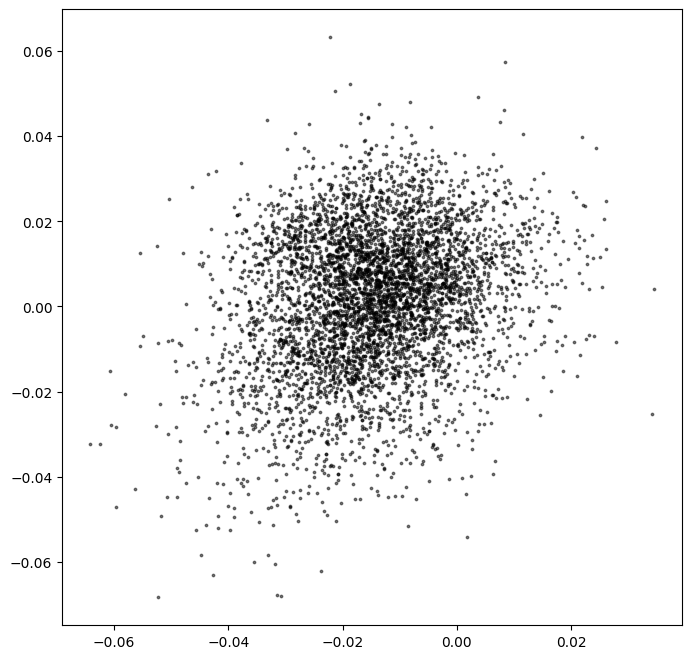

In [30]:
#Show the encoded points in the 2D
figsize = 8

plt.figure(figsize = (figsize , figsize))
plt.scatter(embeddings[: , 0] , embeddings[:,1], c= "black", alpha = 0.5 , s = 3)
plt.show()

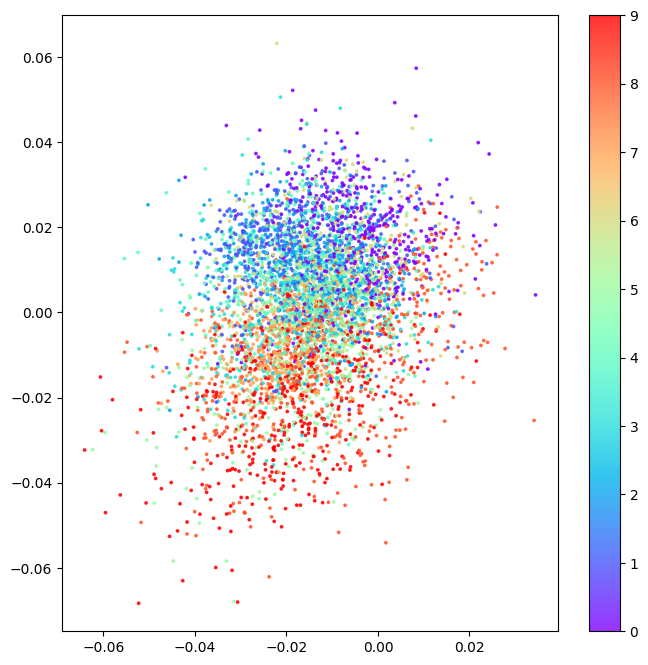

In [31]:
#color the embeddings by their label (clothings type - )
example_labels = y_test[:n_to_predict]

figsize = 8
plt.figure(figsize = (figsize , figsize))
plt.scatter(
    embeddings[: , 0],
    embeddings[: , 1],
    cmap = "rainbow",
    c = example_labels ,
    alpha = 0.8,
    s = 3,
)
plt.colorbar()
plt.show()



#6. Generate using the decoder

In [32]:
#get the range of the existing embeddings
mins , maxs = np.min(embeddings, axis = 0), np.max(embeddings, axis = 0)

#Sample some points in the latent space
grid_width , grid_height = (6, 3)
sample = np.random.uniform(
    mins , maxs , size = (grid_width * grid_height , EMBEDDING_DIM)
)

In [33]:
#Decode the samples points
reconstructions = decoder.predict(sample)

1/1 [==============================] - 0s 125ms/step


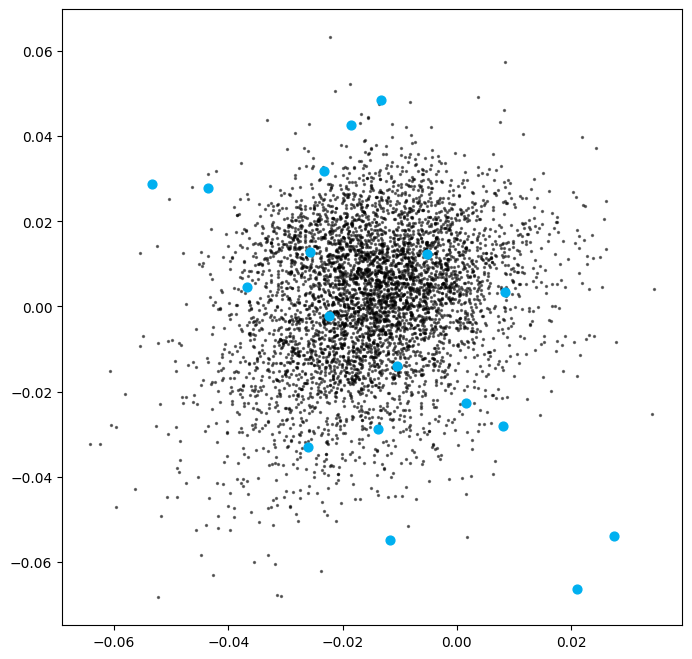

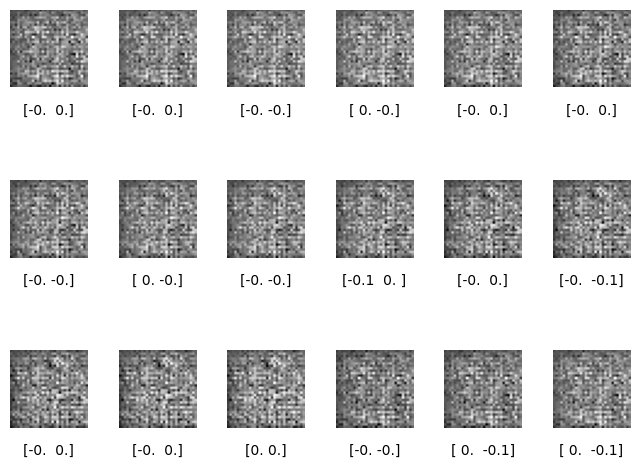

In [37]:
#Draw a plot of ....
figsize = 8
plt.figure(figsize = (figsize, figsize))

#...... the orginal embeddings
plt.scatter(embeddings[:, 0], embeddings[:,1], c = "black" , alpha = 0.5, s = 2)

#... and the newly generated points in the latent space
plt.scatter(sample[:, 0], sample[: , 1] , c = "#00B0F0", alpha = 1 , s = 40)
plt.show()

#add underneath a grid of the decoded images
fig = plt.figure(figsize = (figsize, grid_height * 2))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(grid_width * grid_height):
  ax = fig.add_subplot(grid_height , grid_width , i + 1)
  ax.axis("off")
  ax.text(
      0.5,
      -0.35,
      str(np.round(sample[i , :] , 1)),
      fontsize = 10,
      ha = "center",
      transform = ax.transAxes,
  )
  ax.imshow(reconstructions[i , : , :] , cmap = "Greys")

8/8 [==============================] - 0s 24ms/step


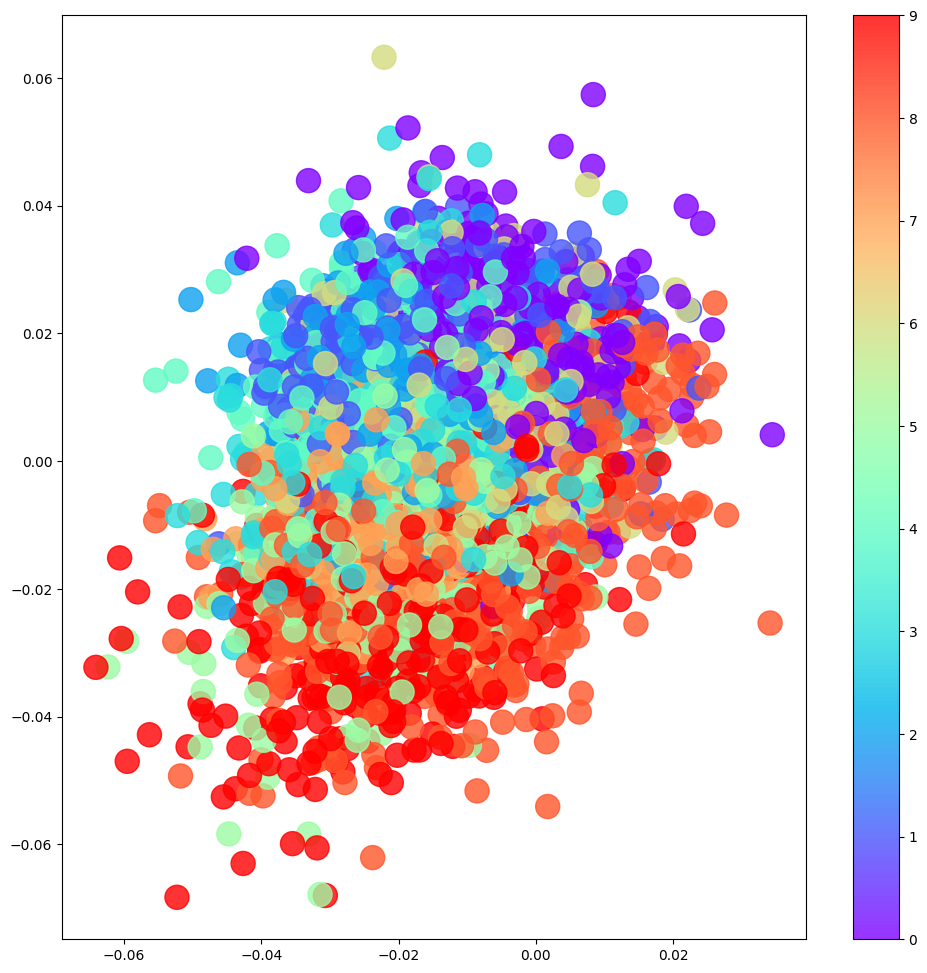

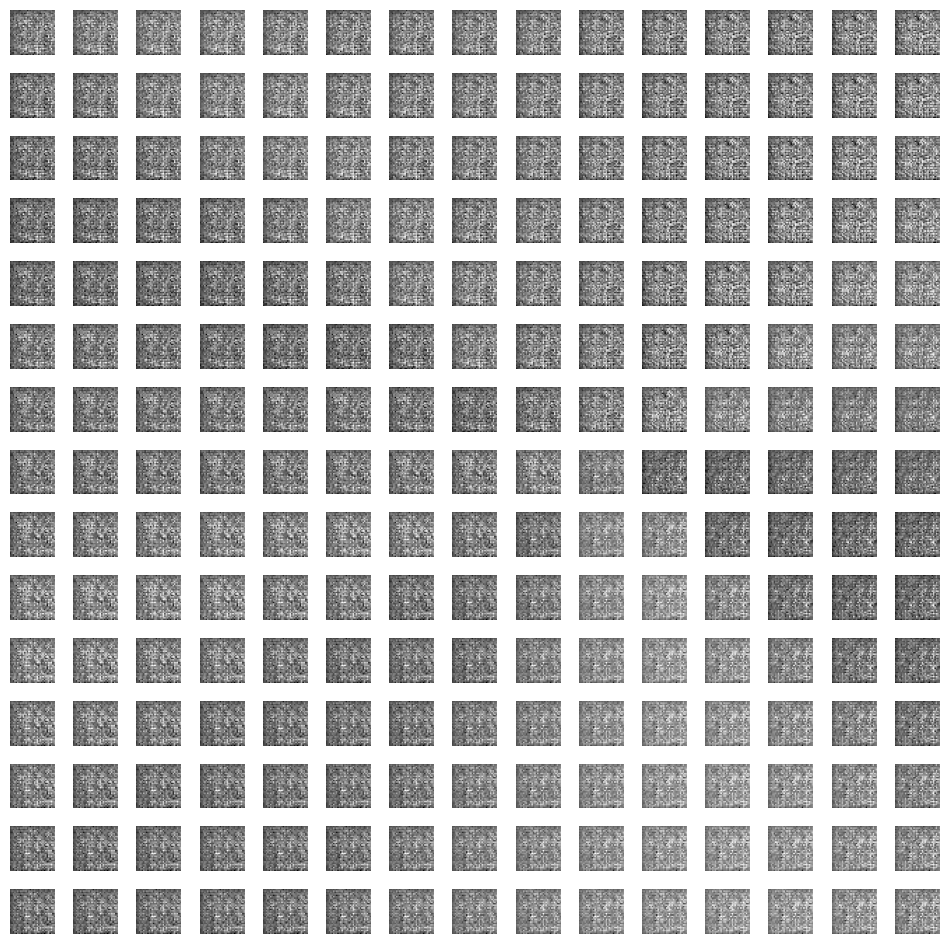

In [38]:
#color the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize = (figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap = "rainbow",
    c = example_labels,
    alpha = 0.8,
    s = 300,
)
plt.colorbar()

x = np.linspace(min(embeddings[:,0]), max(embeddings[:, 0]), grid_size)
y = np.linspace(max(embeddings[:,1]), min(embeddings[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
plt.show()


fig = plt.figure(figsize = (figsize , figsize))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(grid_size ** 2):
  ax = fig.add_subplot(grid_size , grid_size , i + 1)
  ax.axis("off")
  ax.imshow(reconstructions[i, :, :], cmap = "Greys")
